In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline

In [2]:
fname = 'average-precipitation-1901-2020_br__germany.csv'

df = pd.read_csv(fname , index_col='Category'). \
    rename(columns = {'Annual Mean' : 'Precipitation'}). \
        drop(columns = {'Smoothed'})

In [3]:
df.index = df.index.rename('Year')

In [4]:
df['CMA3'] = df.Precipitation.rolling(3, center = True, min_periods=1).mean()

df['CMA7'] = df.Precipitation.rolling(7,center = True, min_periods=1).mean()



In [5]:
df

,Precipitation,CMA3,CMA7
Year,,,
1901,661.28,655.365000,653.900000
1902,649.45,668.110000,664.124000
1903,693.60,651.440000,669.245000
1904,611.27,669.963333,662.938571
1905,705.02,670.380000,655.732857
...,...,...,...
2016,692.90,708.990000,680.180000
2017,793.69,681.513333,668.341429
2018,557.95,671.650000,664.815000


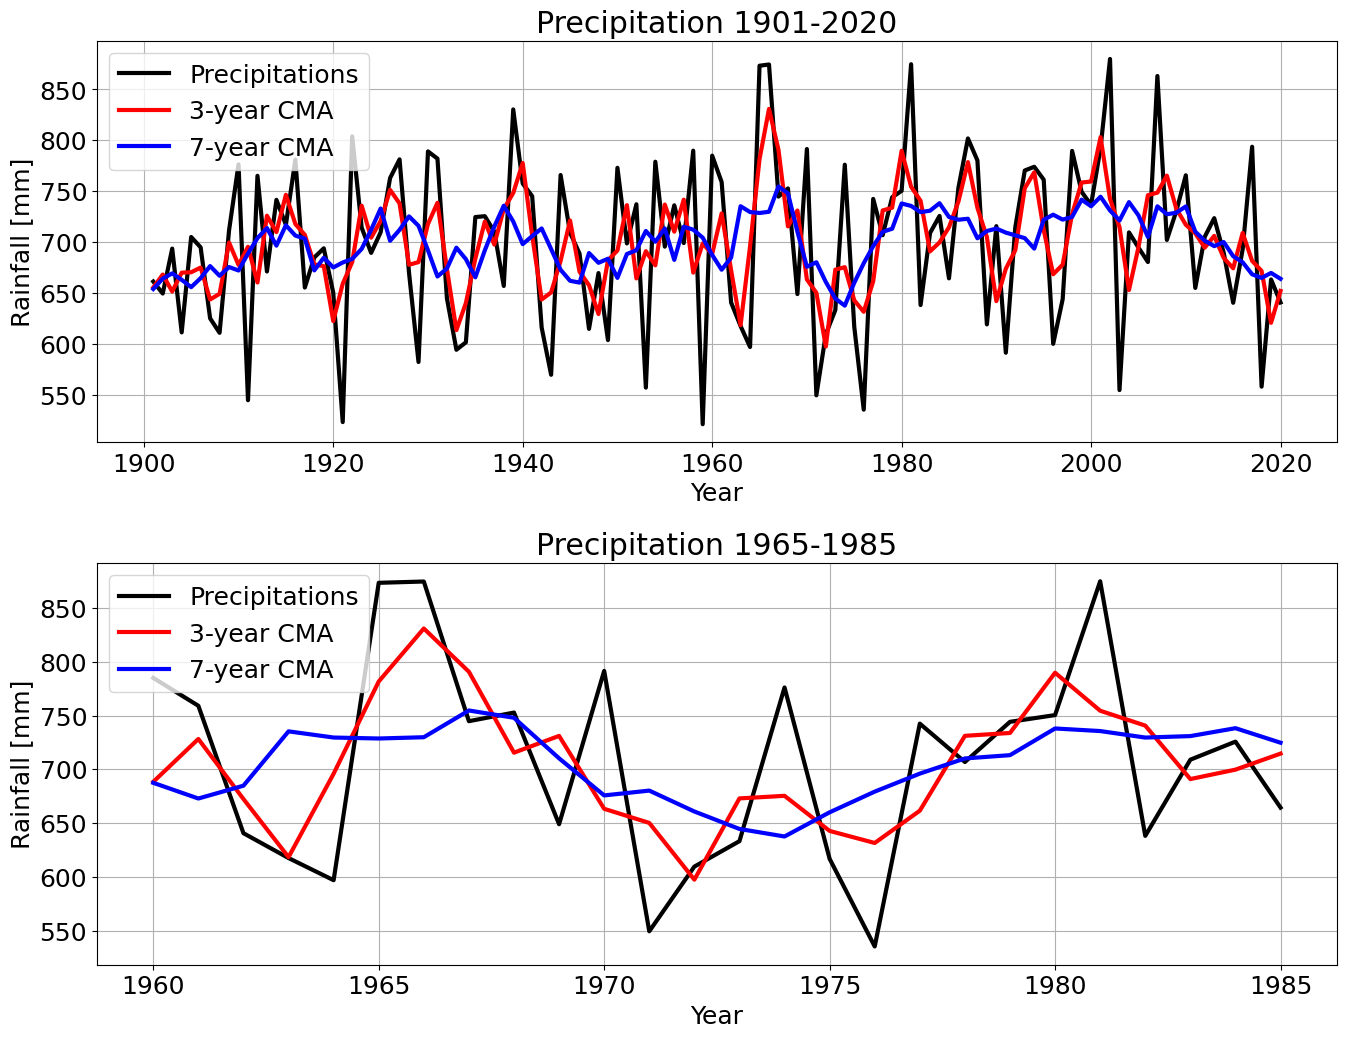

In [8]:
plt.rcParams.update({'font.size' : 18})

fig, axs = plt.subplots(nrows=2,ncols=1, figsize = (16,12), dpi=100)
plt.subplots_adjust(hspace = 0.3)

colors = ['k', 'red', 'blue']

df.plot(ax=axs[0], color = colors, linewidth=3)

axs[0].set_title('Precipitation 1901-2020')
axs[0].set(xlabel='Year', ylabel='Rainfall [mm]')
axs[0].legend(labels=['Precipitations', '3-year CMA', '7-year CMA'])
axs[0].grid()

df.loc[1960:1985].plot(ax=axs[1], color = colors, linewidth=3)

axs[1].set_title('Precipitation 1965-1985')
axs[1].set(xlabel='Year', ylabel='Rainfall [mm]')
axs[1].legend(labels=['Precipitations', '3-year CMA', '7-year CMA'])
axs[1].grid()